In [ ]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

##Load Data

In [ ]:
url='https://drive.google.com/file/d/1fGofArFNi85I39y2Hv3vALTRYATgRfGb/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dfs = pd.read_csv(dwn_url)
dfs.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
dfs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [ ]:
df=dfs.copy()

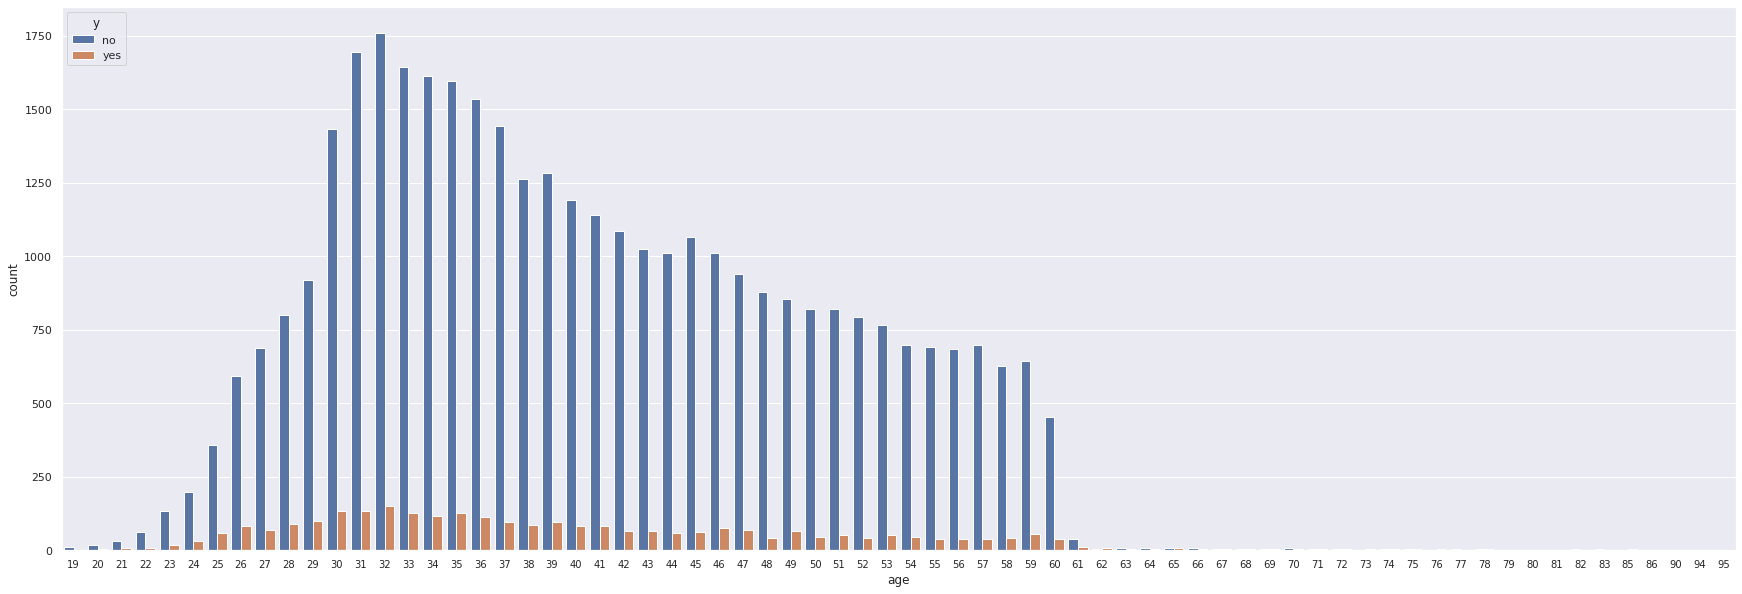

In [ ]:
plt.figure(figsize = (30, 10))
sns.countplot(x="age", hue='y', data=df)
plt.xticks(fontsize=10);

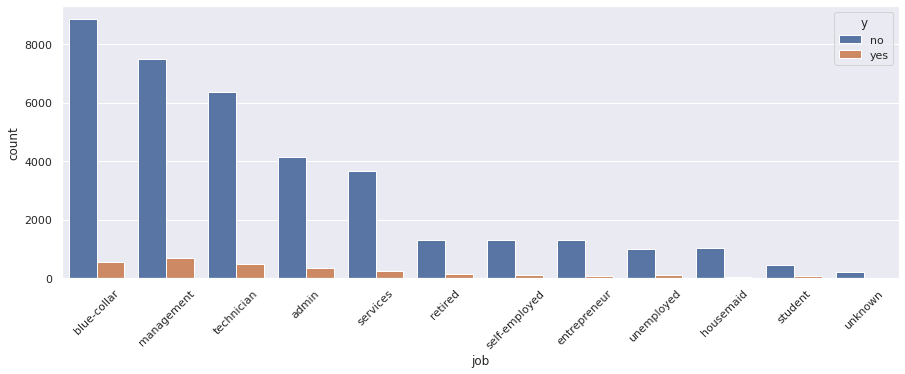

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="job", hue='y', data=df, order = df['job'].value_counts().index)
plt.xticks(rotation = 45);

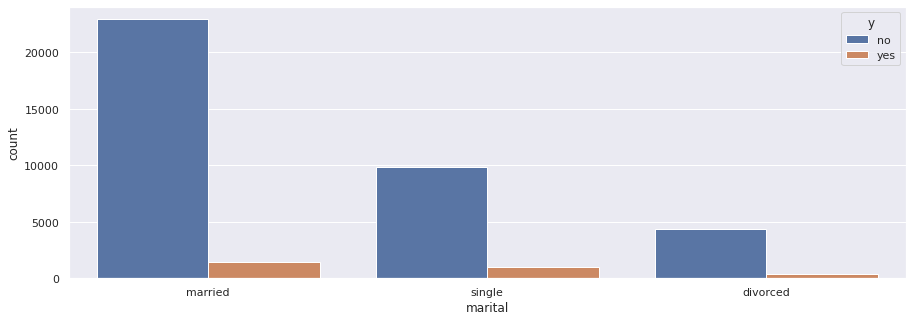

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="marital", hue='y', data=df);

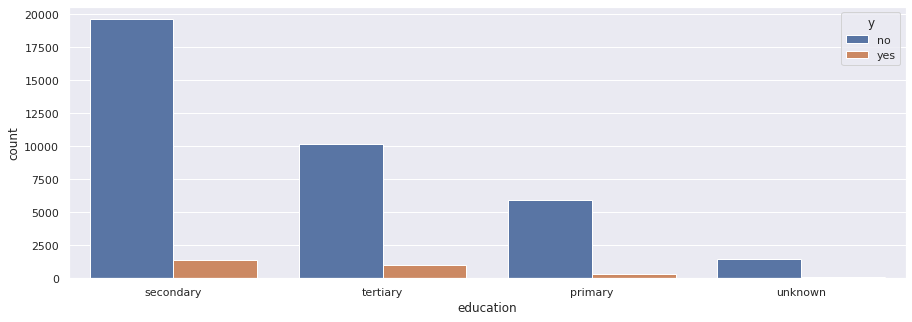

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="education", hue='y', data=df, order = df['education'].value_counts().index);

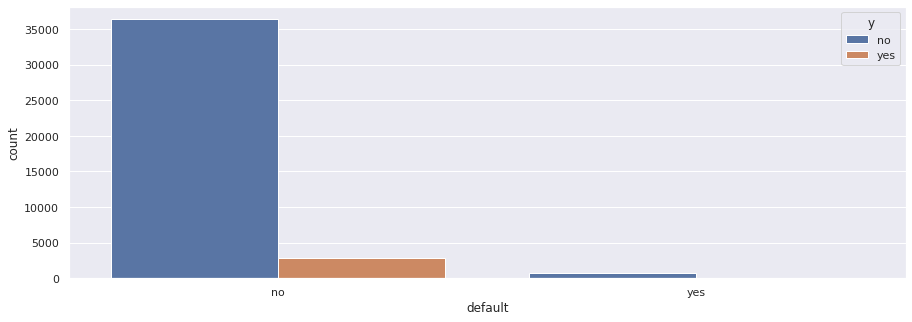

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="default", hue='y', data=df);

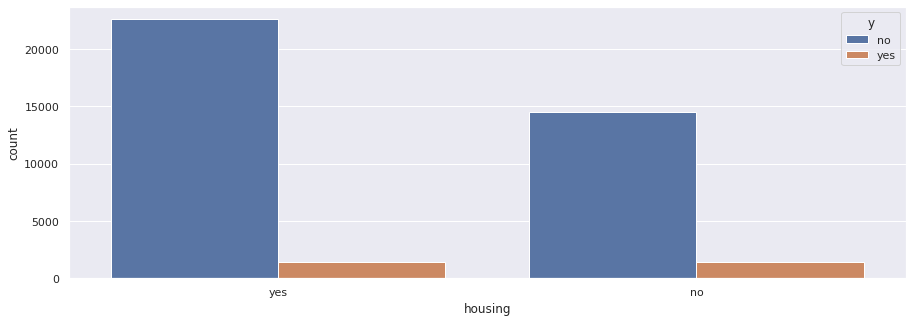

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="housing", hue='y', data=df, order = df['housing'].value_counts().index);

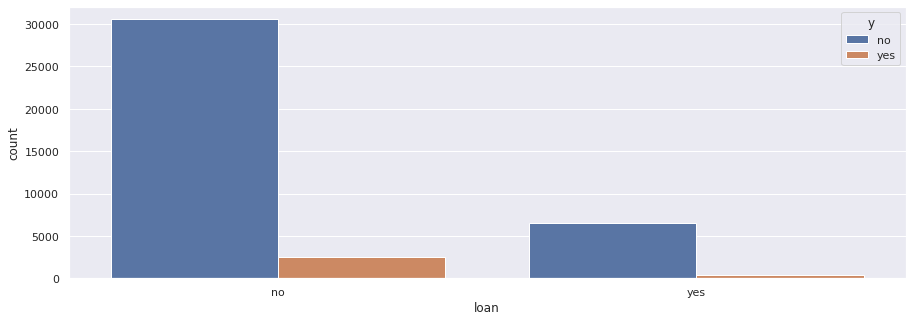

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="loan", hue='y', data=df);

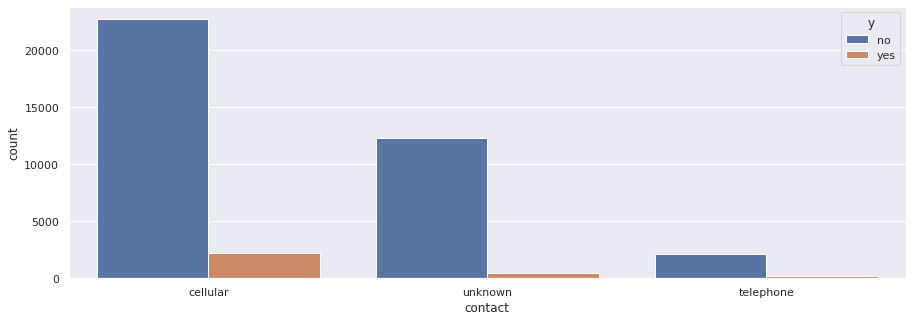

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="contact", hue='y', data=df, order = df['contact'].value_counts().index);

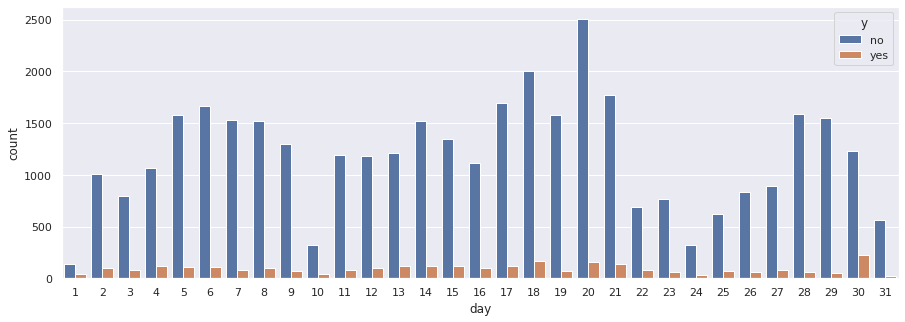

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="day", hue='y', data=df);

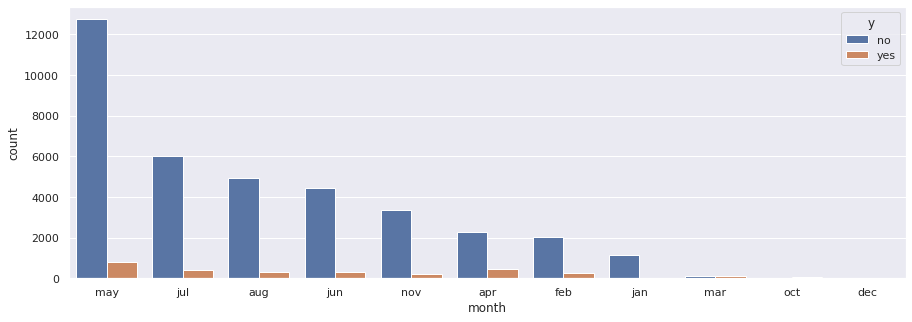

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="month", hue='y', data=df, order = df['month'].value_counts().index);

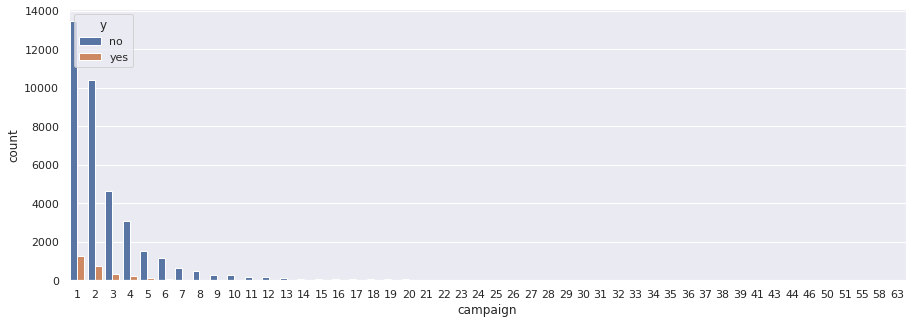

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x="campaign", hue='y', data=df);

<Figure size 2160x2160 with 0 Axes>

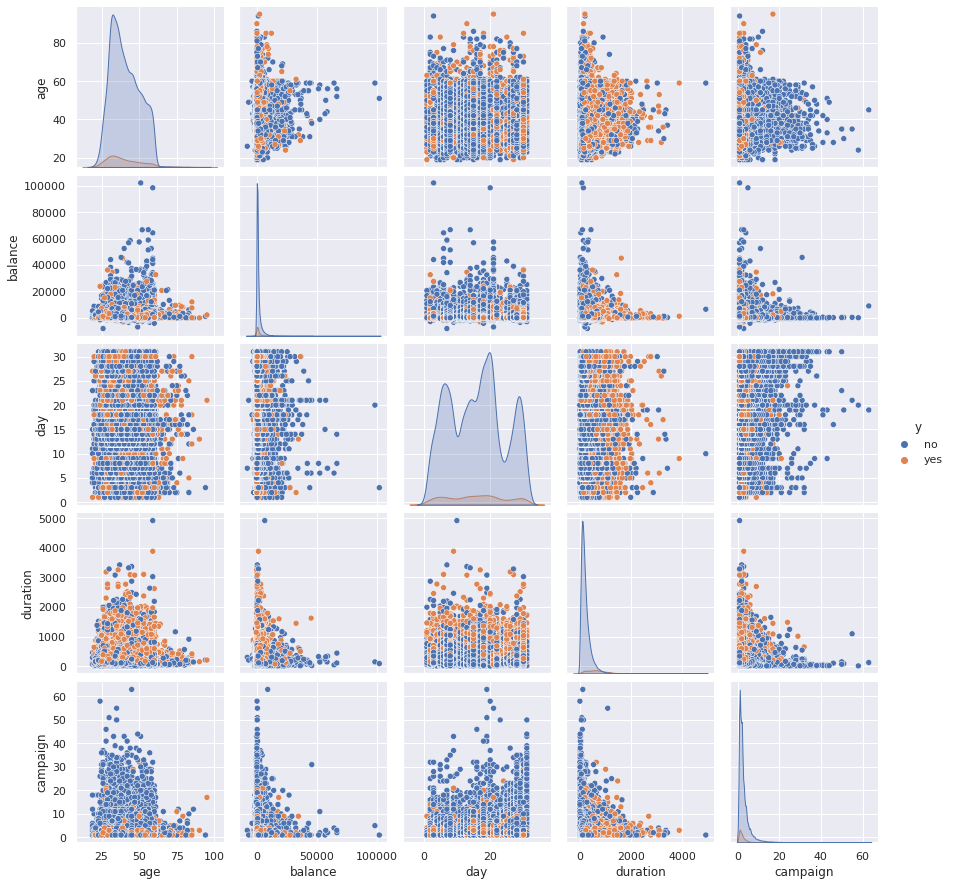

In [ ]:
plt.figure(figsize = (30, 30))
sns.pairplot(df, hue='y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


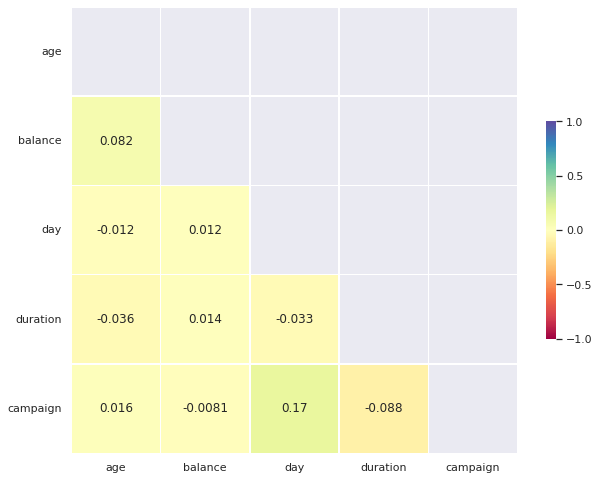

In [ ]:
#correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'Spectral',
                      cbar_kws = {'shrink': .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

# Data Prep & Start H2O


In [ ]:
#start H2O cluster
! pip install h2o
import h2o

#initialize
h2o.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 45 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=d0ff4dfd0ddfb12cea862d9184ca83a06a5c7b0f3f8d9353719e4b2cb4a9e8d0
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw1kmimoj
  JVM stdout: /tmp/tmpw1kmimoj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_asrhlr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8.81 Gb
H2O_cluster_total_cores:,40
H2O_cluster_allowed_cores:,40
H2O_cluster_status:,"locked, healthy"


In [ ]:
#convert pandas df into h2o frame
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#preview
h2o_df

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [ ]:
#statistics
h2o_df.describe()

#enum ~ categorical data

Rows:40000
Cols:14




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,enum
mins,19.0,,,,,-8019.0,,,,1.0,,0.0,1.0,
mean,40.54459999999968,,,,,1274.2775500000057,,,,16.017224999999996,,254.82430000000008,2.8821750000000117,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,
sigma,9.641775507440142,,,,,2903.769715555982,,,,8.278127293305053,,259.3664981334683,3.23905149013395,
zeros,0,,,,,3209,,,,0,,3,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,no


## Train Test Split


In [ ]:
#split train and test sets
train, test = h2o_df.split_frame(ratios=[.75], seed=121)

#define X and y
X = train.columns
y = 'y'
X.remove(y)

In [ ]:
#for binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [ ]:
X

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign']

In [ ]:
y

'y'

# Run H2O AutoML

In [ ]:
#check class distribution
df.y.value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [ ]:
from h2o.automl import H2OAutoML

#initialize
aml = H2OAutoML(max_runtime_secs=3600,   #keep runtime at max
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 

##I found a noticeable delay(1H) in training processing


In [ ]:
#train
%time 
aml.train(x=X, 
          y=y,
          training_frame=train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_Best1000_1_AutoML_1_20220601_134615

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.022121349687423075
RMSE: 0.14873247690878774
LogLoss: 0.08079324133372548
Null degrees of freedom: 10061
Residual degrees of freedom: 10039
Null deviance: 5266.759611808386
Residual deviance: 1625.8831885998914
AIC: 1671.8831885998914
AUC: 0.9931851783000307
AUCPR: 0.9314665277498062
Gini: 0.9863703566000614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46985011890448036: 


,,no,yes,Error,Rate
0,no,9228.0,98.0,0.0105,(98.0/9326.0)
1,yes,125.0,611.0,0.1698,(125.0/736.0)
2,Total,9353.0,709.0,0.0222,(223.0/10062.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.469850,0.845675,140.0
1,max f2,0.360958,0.881898,181.0
2,max f0point5,0.532856,0.879156,119.0
3,max accuracy,0.482790,0.978036,136.0
4,max precision,0.970375,1.000000,0.0
5,max recall,0.118065,1.000000,289.0
6,max specificity,0.970375,1.000000,0.0
7,max absolute_mcc,0.469850,0.833910,140.0
8,max min_per_class_accuracy,0.292958,0.957967,208.0
9,max mean_per_class_accuracy,0.257262,0.959856,220.0



Gains/Lift Table: Avg response rate:  7.31 %, avg score:  8.13 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010038,0.781944,13.671196,13.671196,1.000000,0.833025,1.000000,0.833025,0.137228,0.137228,1267.119565,1267.119565,0.137228
1,2,0.020076,0.736694,13.671196,13.671196,1.000000,0.757289,1.000000,0.795157,0.137228,0.274457,1267.119565,1267.119565,0.274457
2,3,0.030014,0.685972,13.534484,13.625927,0.990000,0.711127,0.996689,0.767333,0.134511,0.408967,1253.448370,1262.592679,0.408860
3,4,0.040052,0.627273,12.994404,13.467654,0.950495,0.657732,0.985112,0.739864,0.130435,0.539402,1199.440379,1246.765428,0.538759
4,5,0.050089,0.570874,10.964028,12.965936,0.801980,0.600739,0.948413,0.711984,0.110054,0.649457,996.402820,1196.593556,0.646669
5,6,0.100080,0.329171,5.870732,9.421857,0.429423,0.448744,0.689176,0.580495,0.293478,0.942935,487.073213,842.185679,0.909373
6,7,0.150070,0.157616,0.978455,6.609254,0.071571,0.235498,0.483444,0.465572,0.048913,0.991848,-2.154465,560.925353,0.908211
7,8,0.200060,0.074003,0.163076,4.998510,0.011928,0.112323,0.365623,0.377304,0.008152,1.000000,-83.692411,399.850969,0.863071
8,9,0.300040,0.020214,0.000000,3.332892,0.000000,0.039981,0.243789,0.264900,0.000000,1.000000,-100.000000,233.289169,0.755201
9,10,0.400020,0.005650,0.000000,2.499876,0.000000,0.011355,0.182857,0.201529,0.000000,1.000000,-100.000000,149.987578,0.647330




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.04182623055908864
RMSE: 0.20451462187112354
LogLoss: 0.13448699051608085
Null degrees of freedom: 30059
Residual degrees of freedom: 30032
Null deviance: 15536.268954703522
Residual deviance: 8085.357869826781
AIC: 8141.357869826781
AUC: 0.9495273463427585
AUCPR: 0.5612880289384669
Gini: 0.899054692685517

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2779438253239533: 


,,no,yes,Error,Rate
0,no,26324.0,1576.0,0.0565,(1576.0/27900.0)
1,yes,611.0,1549.0,0.2829,(611.0/2160.0)
2,Total,26935.0,3125.0,0.0728,(2187.0/30060.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.277944,0.586187,203.0
1,max f2,0.121815,0.699748,281.0
2,max f0point5,0.500080,0.563484,112.0
3,max accuracy,0.502714,0.939454,111.0
4,max precision,0.916938,1.000000,0.0
5,max recall,0.000157,1.000000,399.0
6,max specificity,0.916938,1.000000,0.0
7,max absolute_mcc,0.216226,0.561471,230.0
8,max min_per_class_accuracy,0.111474,0.886574,287.0
9,max mean_per_class_accuracy,0.066682,0.892827,317.0



Gains/Lift Table: Avg response rate:  7.19 %, avg score:  7.19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010013,0.692778,10.125415,10.125415,0.727575,0.748254,0.727575,0.748254,0.101389,0.101389,912.541528,912.541528,0.098450
1,2,0.020027,0.634437,9.062016,9.593715,0.651163,0.662155,0.689369,0.705205,0.090741,0.192130,806.201550,859.371539,0.185427
2,3,0.030007,0.582204,8.025278,9.072062,0.576667,0.609887,0.651885,0.673503,0.080093,0.272222,702.527778,807.206208,0.260968
3,4,0.040020,0.539409,7.998616,8.803477,0.574751,0.560030,0.632585,0.645111,0.080093,0.352315,699.861573,780.347742,0.336473
4,5,0.050000,0.497457,7.468611,8.537037,0.536667,0.519597,0.613440,0.620058,0.074537,0.426852,646.861111,753.703704,0.406027
5,6,0.100000,0.291877,5.407407,6.972222,0.388556,0.392032,0.500998,0.506045,0.270370,0.697222,440.740741,597.222222,0.643459
6,7,0.150000,0.144136,3.027778,5.657407,0.217565,0.211683,0.406520,0.407924,0.151389,0.848611,202.777778,465.740741,0.752697
7,8,0.200000,0.065922,1.611111,4.645833,0.115768,0.100926,0.333832,0.331175,0.080556,0.929167,61.111111,364.583333,0.785618
8,9,0.300000,0.019181,0.486111,3.259259,0.034930,0.037323,0.234198,0.233224,0.048611,0.977778,-51.388889,225.925926,0.730251
9,10,0.400000,0.006233,0.148148,2.481481,0.010645,0.011331,0.178310,0.177751,0.014815,0.992593,-85.185185,148.148148,0.638471




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.926101,0.003190,0.929795,0.929102,0.922434,0.924676,0.924497
1,auc,0.949629,0.000886,0.950581,0.950429,0.948580,0.948926,0.949631
2,err,0.073899,0.003190,0.070205,0.070898,0.077566,0.075324,0.075503
3,err_count,444.400000,22.810085,422.000000,420.000000,473.000000,453.000000,454.000000
4,f0point5,0.525967,0.018509,0.541118,0.547739,0.502261,0.522317,0.516401
5,f1,0.588749,0.014872,0.590291,0.608939,0.568037,0.592992,0.583486
6,f2,0.668971,0.017190,0.649295,0.685535,0.653636,0.685786,0.670603
7,lift_top_group,10.305966,0.731640,9.470758,10.167048,10.744140,9.836142,11.311744
8,logloss,0.134490,0.000868,0.135646,0.134693,0.133766,0.134847,0.133497
9,max_per_class_error,0.263807,0.026563,0.304348,0.251716,0.273364,0.234339,0.255269



See the whole table with table.as_data_frame()


# AutoML Leaderboard and Ensemble Exploration

In [ ]:
#view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows) #show all the rows

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_Best1000_1_AutoML_1_20220601_134615,0.949527,0.134487,0.561288,0.169679,0.204515,0.0418262
StackedEnsemble_AllModels_4_AutoML_1_20220601_134615,0.949486,0.134567,0.557191,0.17624,0.204635,0.0418755
StackedEnsemble_AllModels_6_AutoML_1_20220601_134615,0.949463,0.134509,0.560159,0.175157,0.204516,0.0418269
StackedEnsemble_AllModels_3_AutoML_1_20220601_134615,0.949125,0.134954,0.555068,0.172416,0.204818,0.0419503
StackedEnsemble_AllModels_2_AutoML_1_20220601_134615,0.948874,0.135056,0.557379,0.162372,0.205003,0.0420261
StackedEnsemble_BestOfFamily_5_AutoML_1_20220601_134615,0.948691,0.135259,0.554394,0.161646,0.205176,0.0420974
StackedEnsemble_BestOfFamily_4_AutoML_1_20220601_134615,0.948602,0.135372,0.54998,0.173898,0.205155,0.0420885
StackedEnsemble_AllModels_5_AutoML_1_20220601_134615,0.948587,0.137139,0.545569,0.165336,0.206028,0.0424475
StackedEnsemble_BestOfFamily_7_AutoML_1_20220601_134615,0.948302,0.135514,0.556709,0.164313,0.205129,0.0420777
StackedEnsemble_BestOfFamily_3_AutoML_1_20220601_134615,0.948253,0.135637,0.553,0.178681,0.20545,0.0422096


In [ ]:
#look at best model
se = aml.leader
metalearner = h2o.get_model(se.metalearner()model_id)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


In [ ]:
#look at important variables
metalearner.varimp()

[('DRF_1_AutoML_1_20220601_134615',
  0.4620513319969177,
  1.0,
  0.14725274705346295),
 ('DeepLearning_grid_3_AutoML_1_20220601_134615_model_4',
  0.40915724635124207,
  0.8855233564264923,
  0.13039574681380375),
 ('GBM_5_AutoML_1_20220601_134615',
  0.267680823802948,
  0.5793313540425713,
  0.08530813333697093),
 ('XGBoost_grid_1_AutoML_1_20220601_134615_model_27',
  0.22055746614933014,
  0.47734407602746926,
  0.07029022648474191),
 ('DeepLearning_grid_3_AutoML_1_20220601_134615_model_3',
  0.20262476801872253,
  0.43853302433521435,
  0.06457519250702343),
 ('DeepLearning_grid_2_AutoML_1_20220601_134615_model_8',
  0.18422994017601013,
  0.39872180300789417,
  0.058712880803022116),
 ('XGBoost_lr_search_selection_AutoML_1_20220601_134615_select_grid_model_3',
  0.18370363116264343,
  0.39758273256935206,
  0.058545149551859396),
 ('DeepLearning_grid_3_AutoML_1_20220601_134615_model_2',
  0.17893454432487488,
  0.38726118059555453,
  0.05702527266986262),
 ('XGBoost_grid_1_AutoM

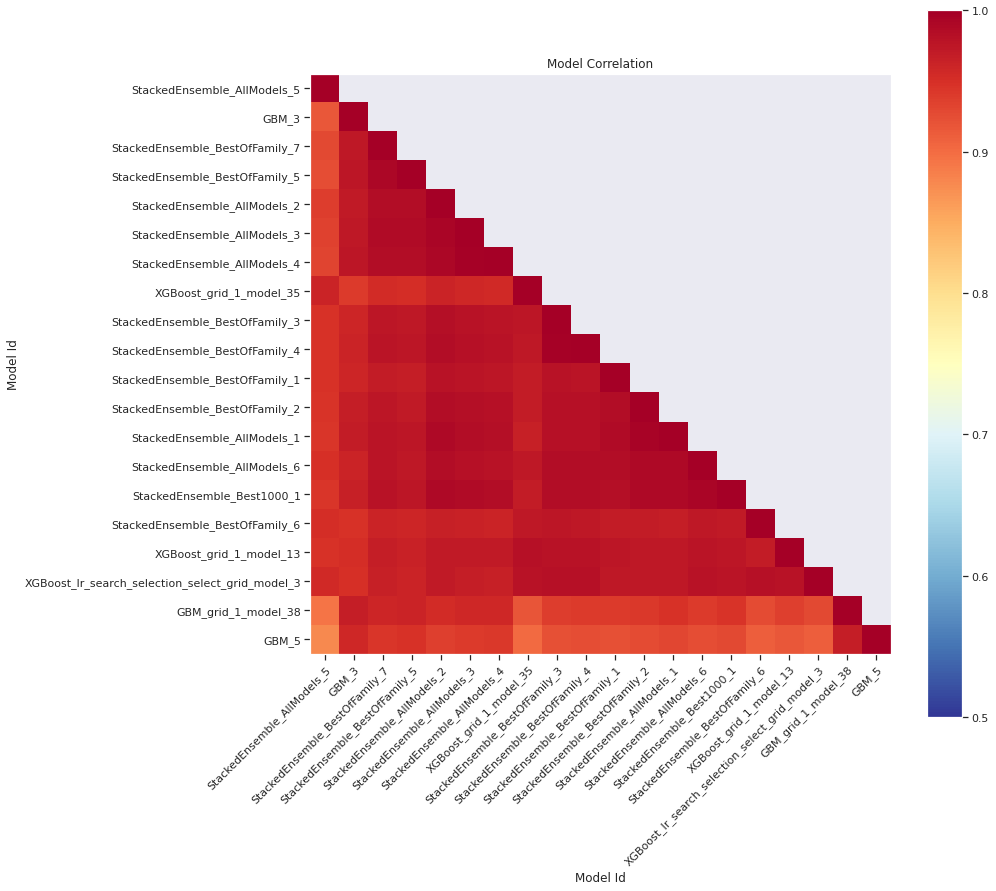

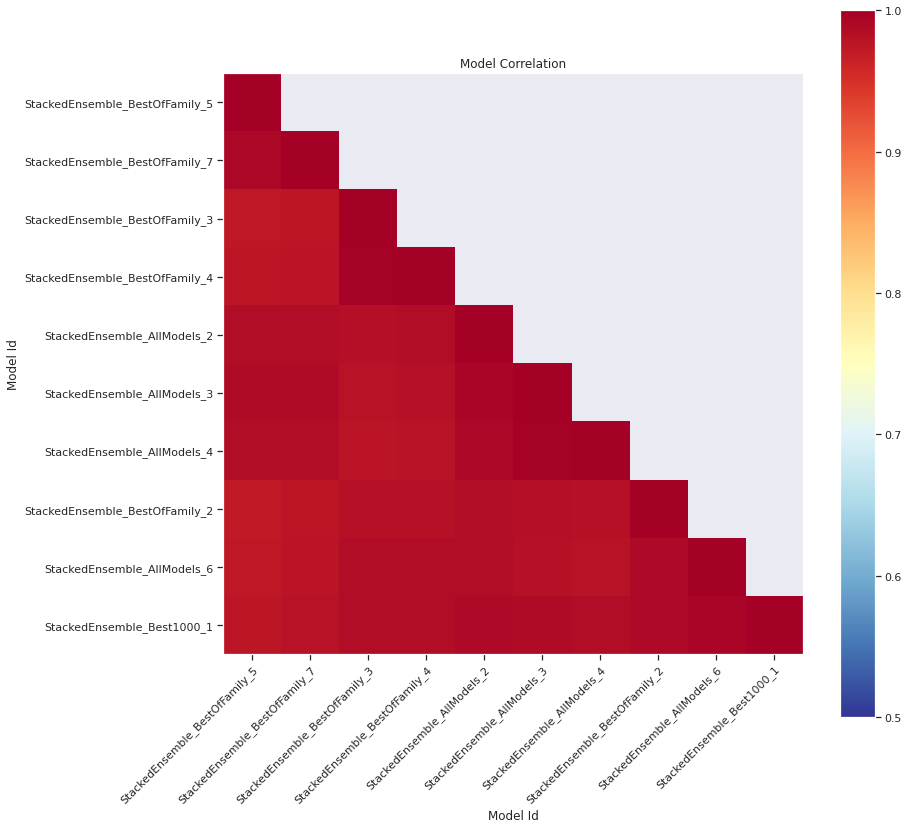

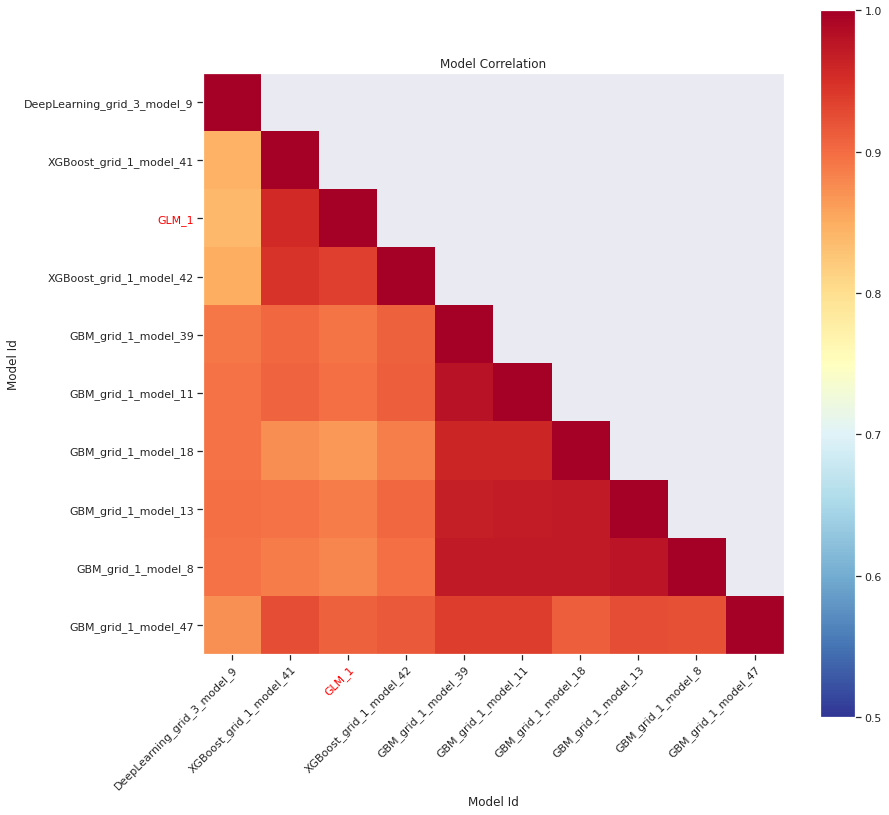

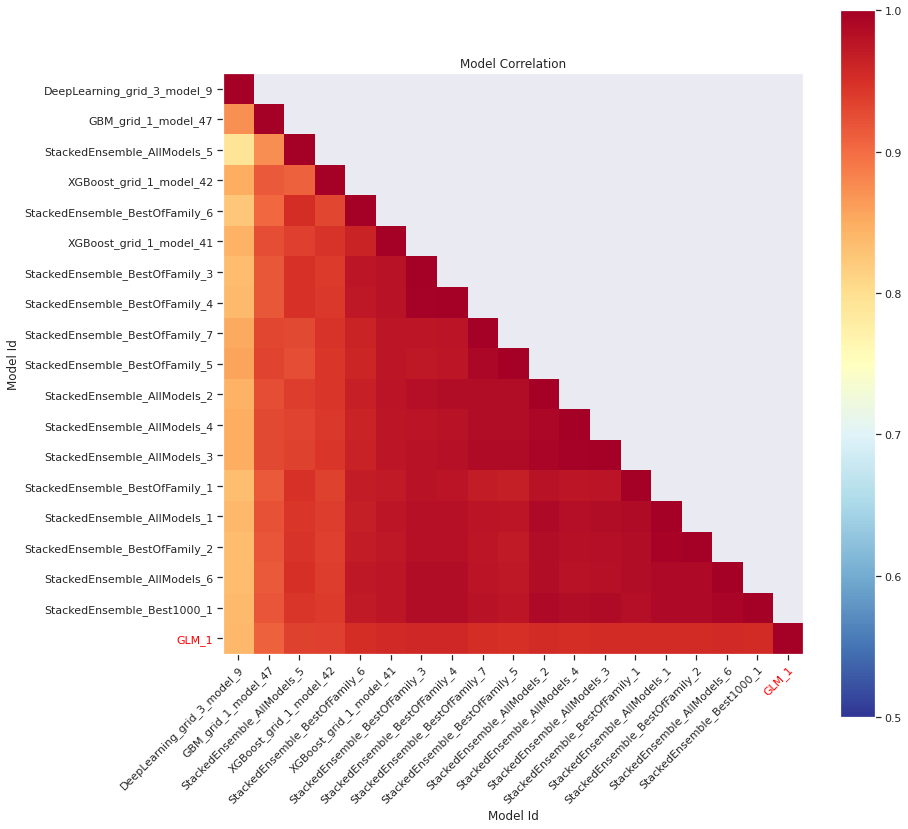

In [ ]:
mc_plot = aml.model_correlation_heatmap(test)

# or if some subset of the models is needed a slice of leaderboard can be used, e.g., using MAE as the sorting metric
mc_plot = h2o.model_correlation_heatmap(aml.leaderboard.sort("rmse").head(10), test)

# or even extended leaderboard can be used
mc_plot = h2o.model_correlation_heatmap(h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms").head(10), test)

# also more complicated queries on leaderboard can be used, e.g., model correlation between 5 fastest models to train and Stacked Ensembles
leaderboard = h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms")
mc_plot = h2o.model_correlation_heatmap(leaderboard.head(5).rbind(leaderboard[leaderboard["model_id"].grep("StackedEnsemble", output_logical=True)]), test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_Best1000_1_AutoML_1_20220601_134615


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3620466818030339: 


,,no,yes,Error,Rate
0,no,8806.0,398.0,0.0432,(398.0/9204.0)
1,yes,231.0,505.0,0.3139,(231.0/736.0)
2,Total,9037.0,903.0,0.0633,(629.0/9940.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

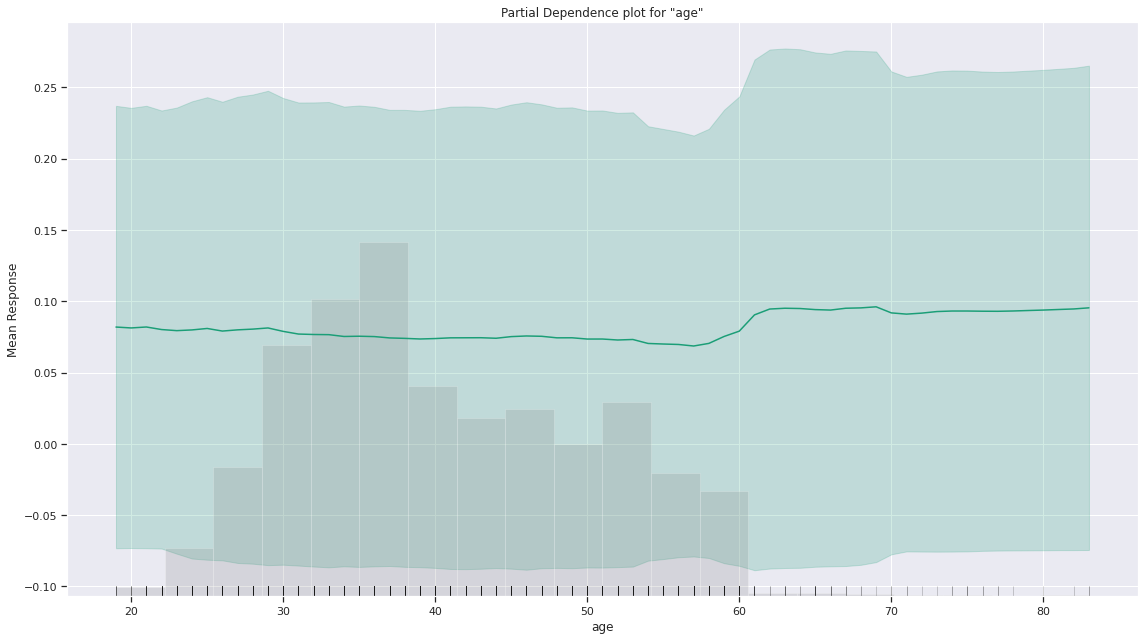

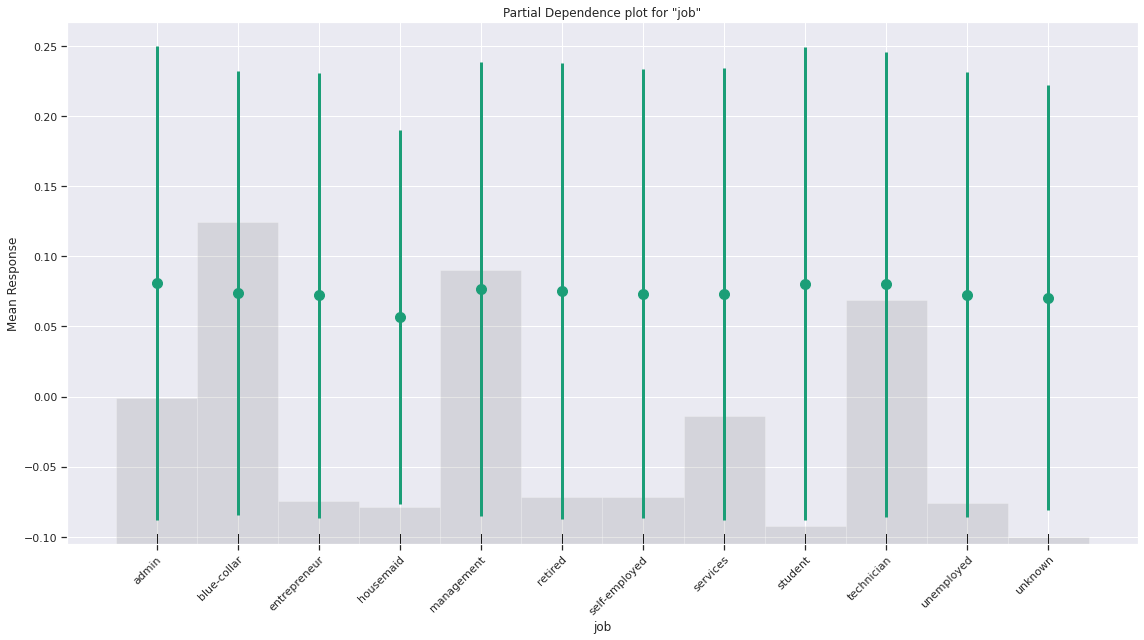

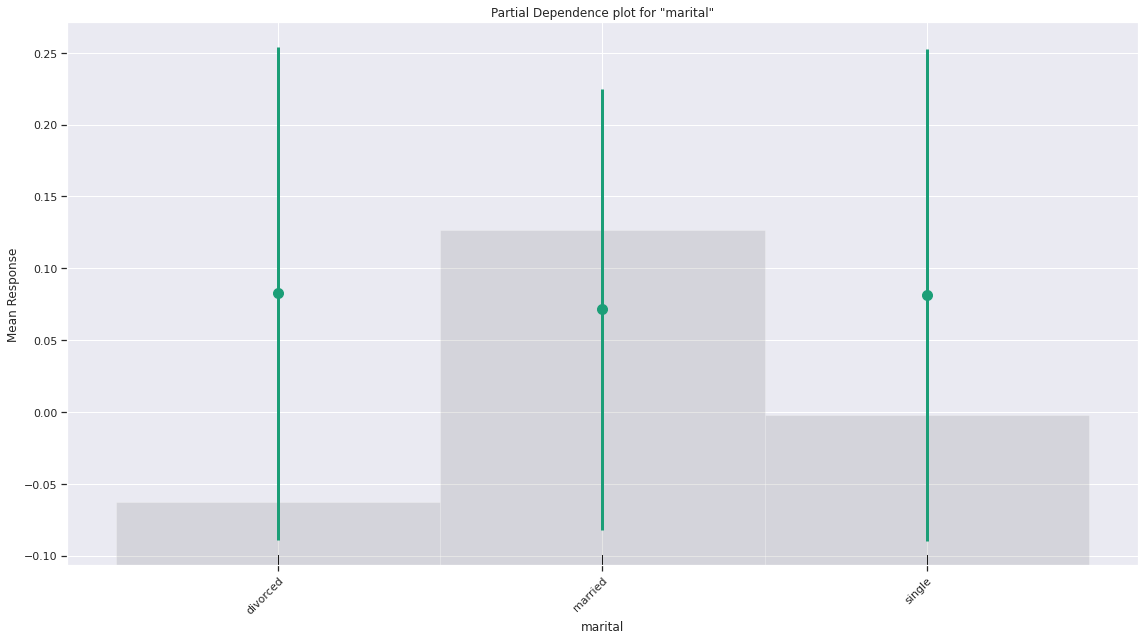

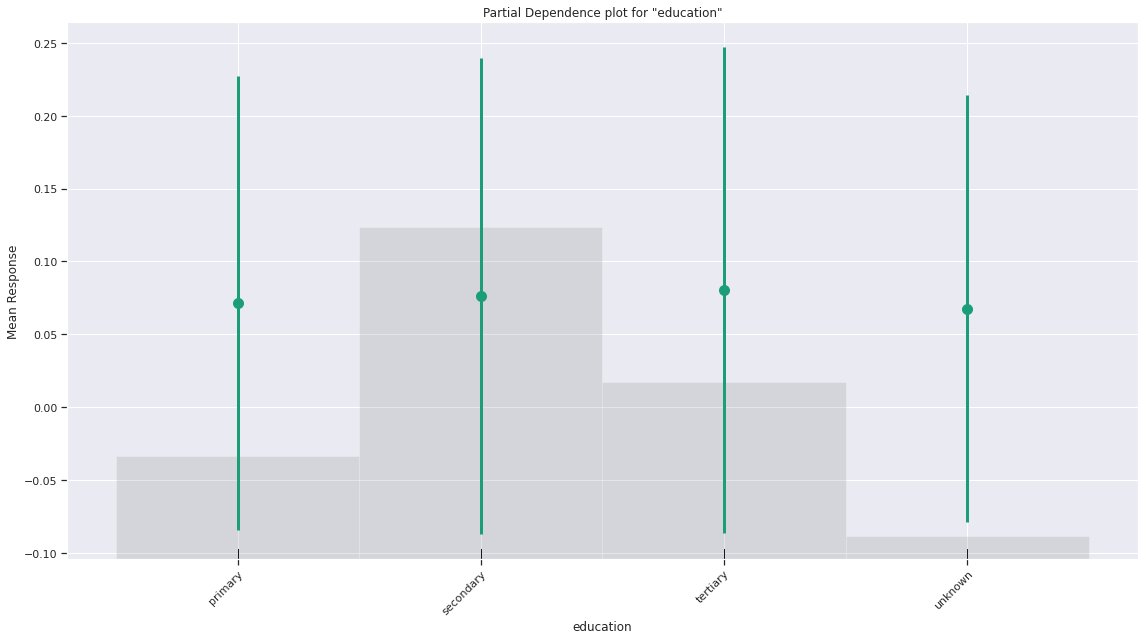

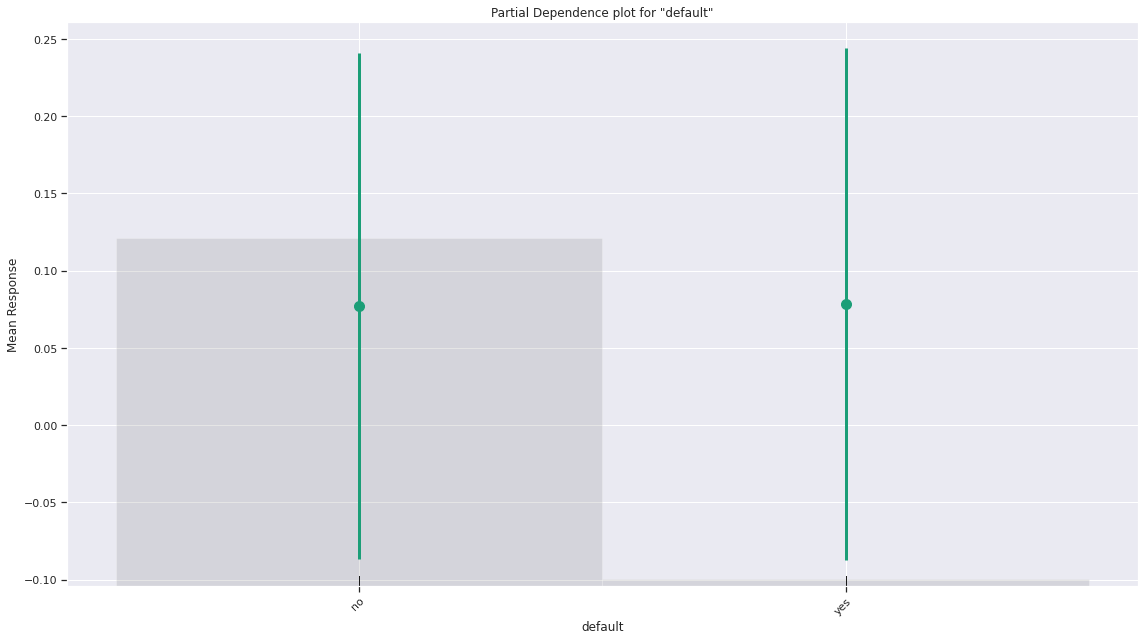

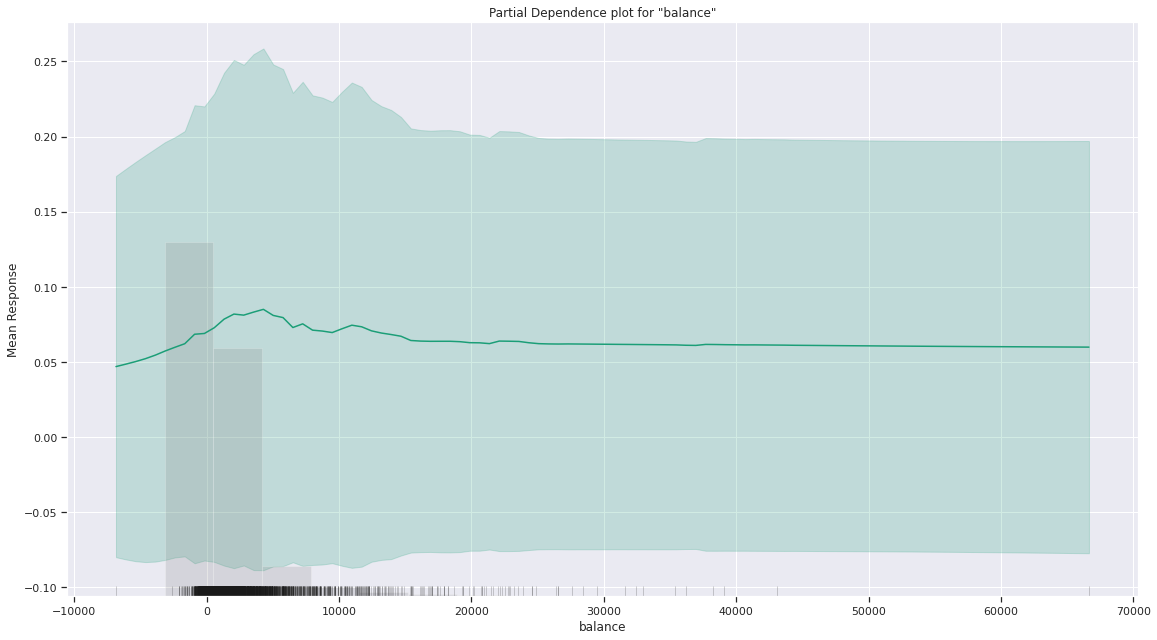

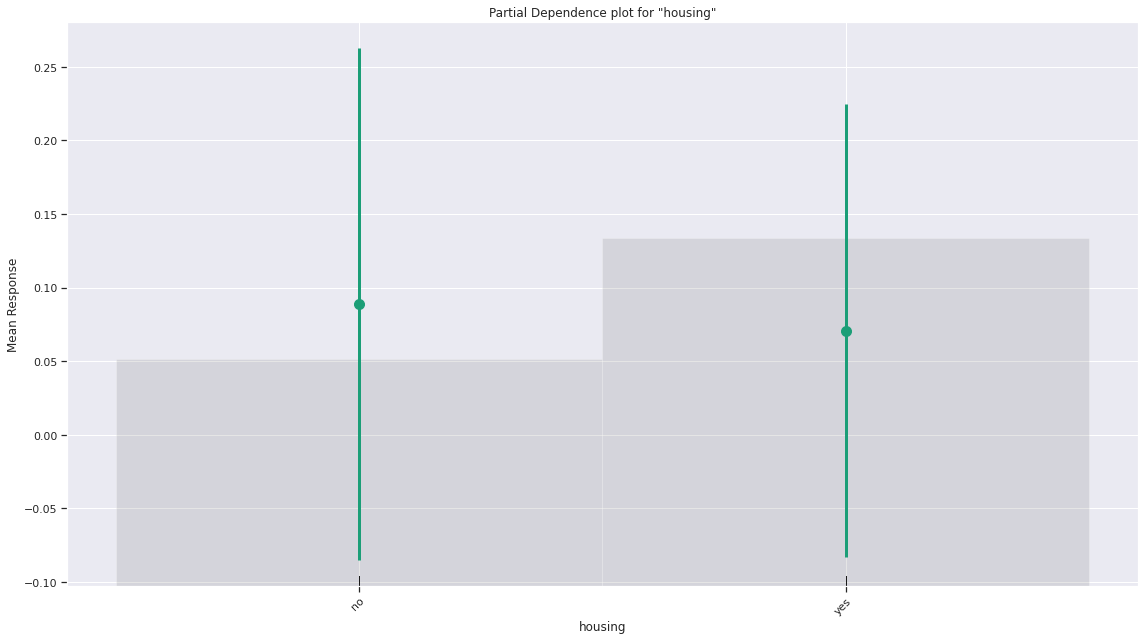

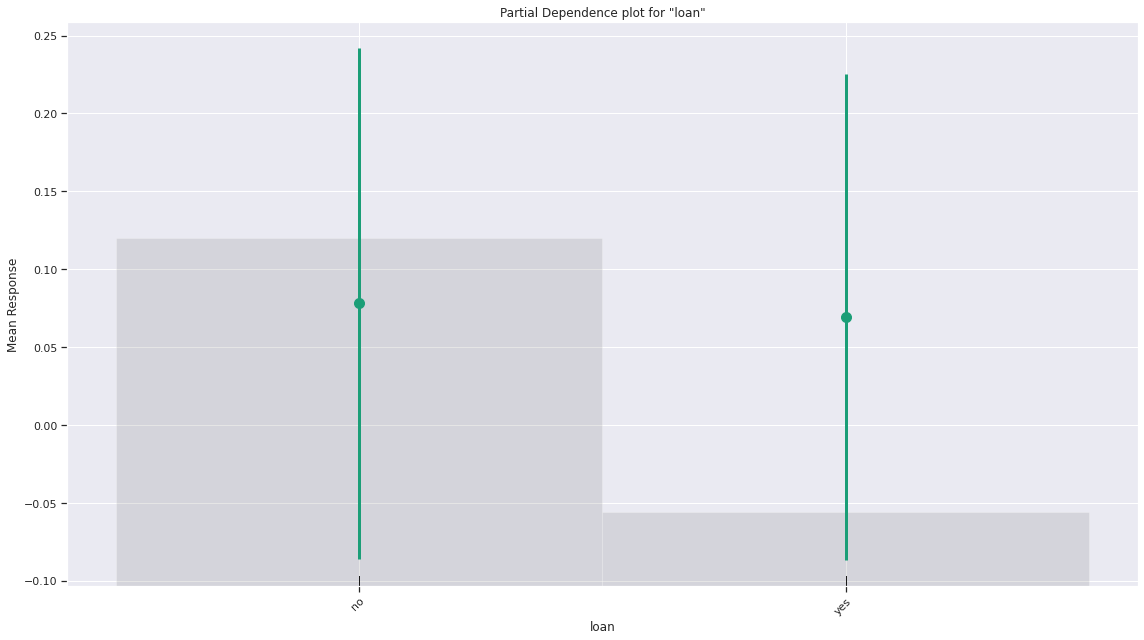

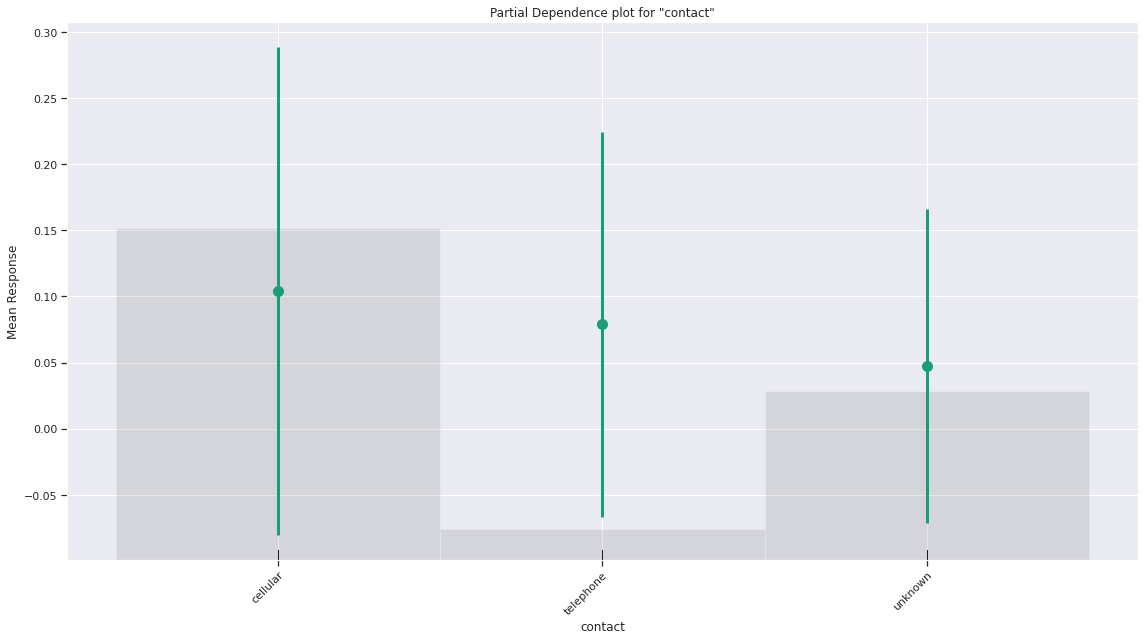

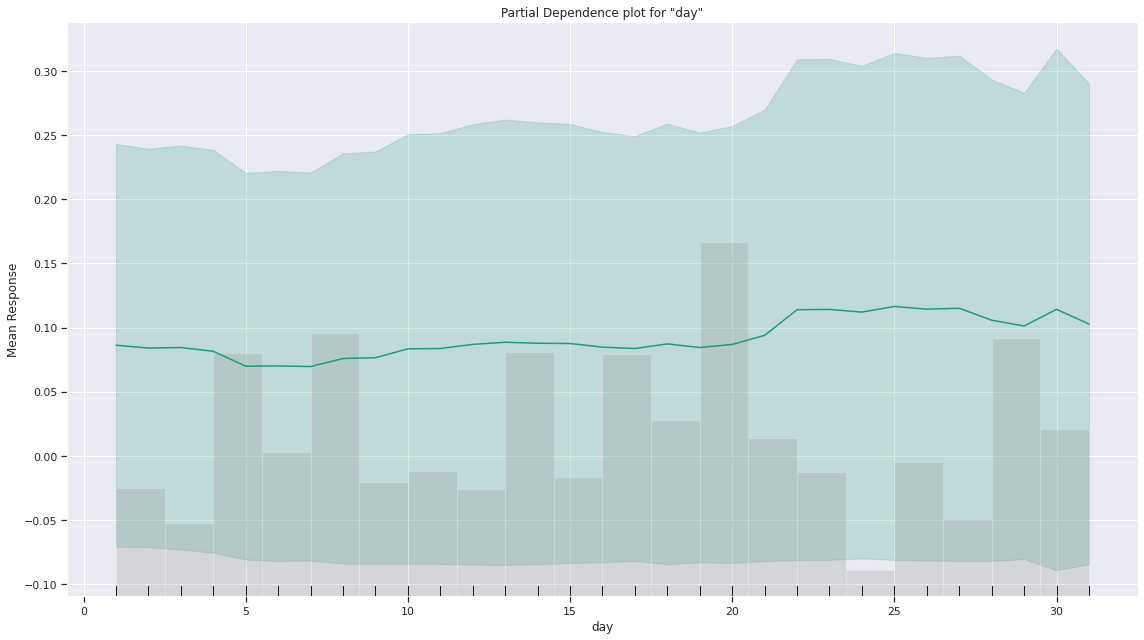

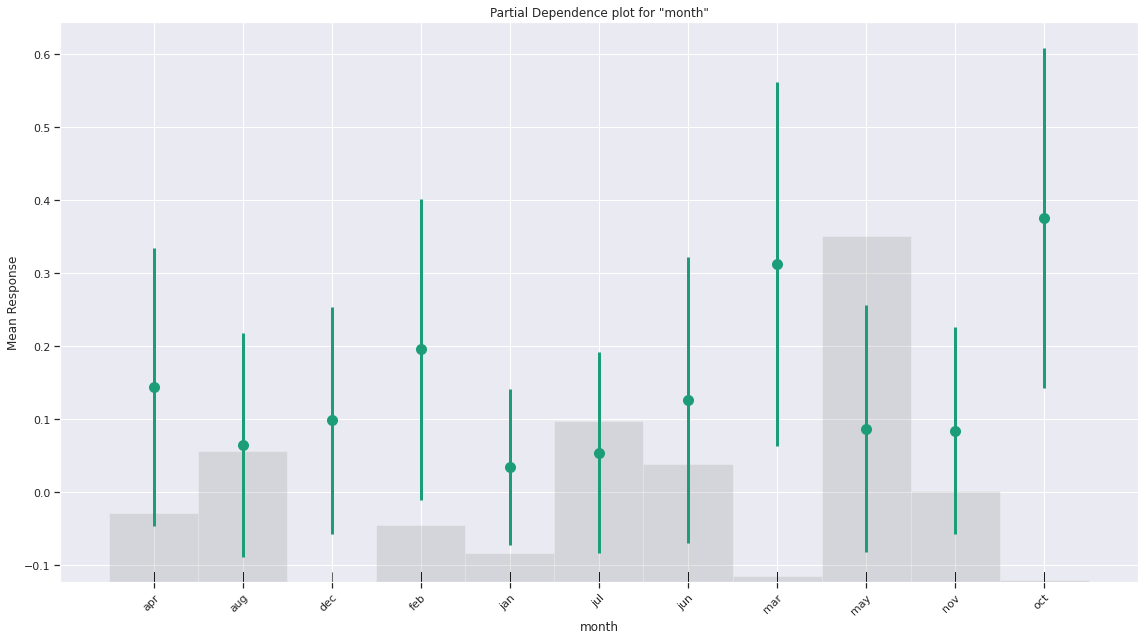

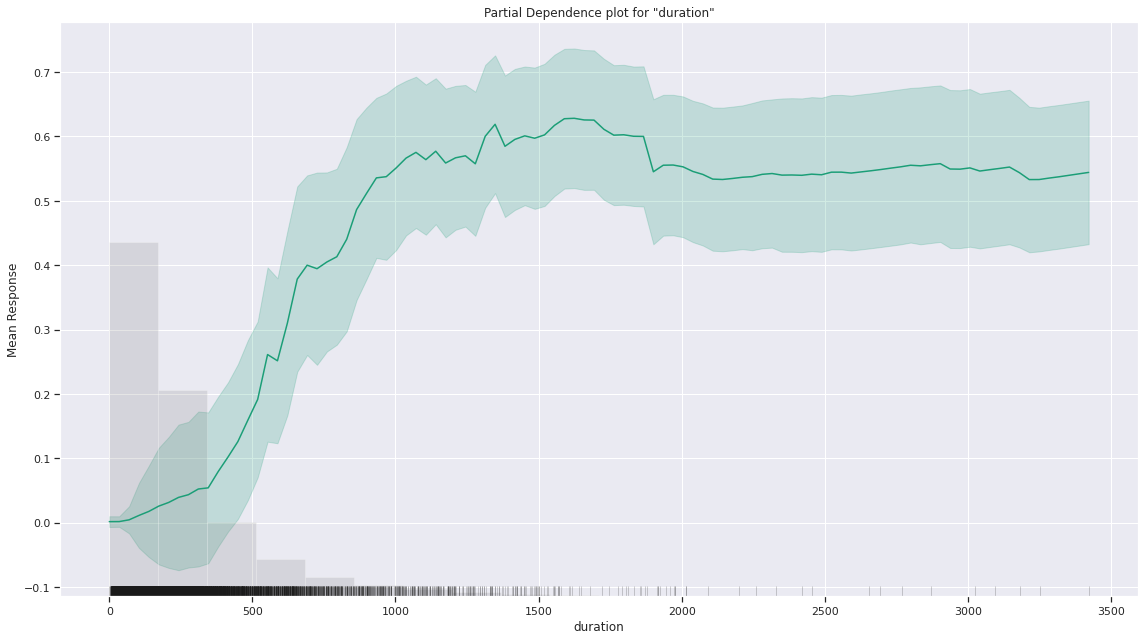

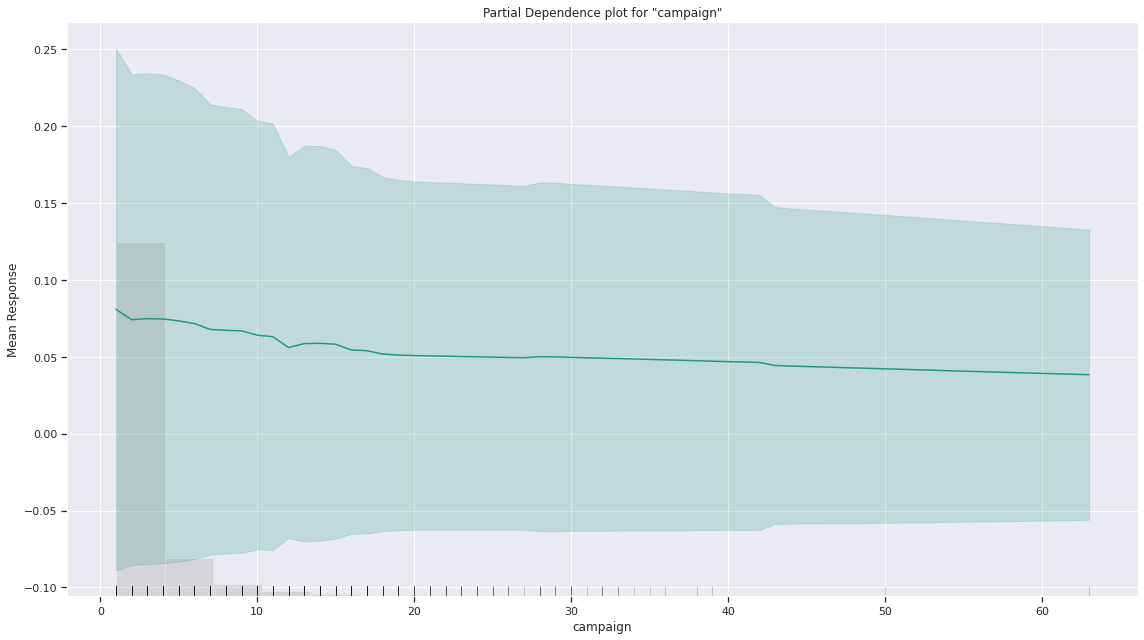

In [ ]:
#explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

# Base Learner Model Exploration

In [ ]:
#import top performing base learner
base_model = h2o.get_model('StackedEnsemble_Best1000_1_AutoML_1_20220601_134615')

In [ ]:
#DRF_1_AutoML_1_20220527_162228
base_model = h2o.get_model('DRF_1_AutoML_1_20220601_134615')

In [ ]:
#evaluate the base learner on the test set
base_model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.06018107934090528
RMSE: 0.24531832247287458
LogLoss: 0.2114543772296659
Mean Per-Class Error: 0.14058159968255768
AUC: 0.9462020588874402
AUCPR: 0.5232299646722978
Gini: 0.8924041177748805

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.03998322874862849: 


,,no,yes,Error,Rate
0,no,8517.0,687.0,0.0746,(687.0/9204.0)
1,yes,152.0,584.0,0.2065,(152.0/736.0)
2,Total,8669.0,1271.0,0.0844,(839.0/9940.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,3.998323e-02,0.581963,285.0
1,max f2,2.964467e-02,0.711704,304.0
2,max f0point5,7.520309e-02,0.540541,224.0
3,max accuracy,1.230965e-01,0.933903,166.0
4,max precision,7.366071e-01,1.000000,0.0
5,max recall,6.065303e-07,1.000000,399.0
6,max specificity,7.366071e-01,1.000000,0.0
7,max absolute_mcc,3.998323e-02,0.563638,285.0
8,max min_per_class_accuracy,2.182295e-02,0.887332,320.0
9,max mean_per_class_accuracy,1.650431e-02,0.898398,334.0



Gains/Lift Table: Avg response rate:  7.40 %, avg score:  1.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010060,0.256383,8.778533,8.778533,0.650000,0.361153,0.650000,0.361153,0.088315,0.088315,777.853261,777.853261,0.084513
1,2,0.020020,0.186600,8.048693,8.415447,0.595960,0.218949,0.623116,0.290408,0.080163,0.168478,704.869346,741.544680,0.160330
2,3,0.030080,0.151030,7.833152,8.220699,0.580000,0.167799,0.608696,0.249402,0.078804,0.247283,683.315217,722.069943,0.234571
3,4,0.040040,0.127244,7.093764,7.940381,0.525253,0.137821,0.587940,0.221647,0.070652,0.317935,609.376372,694.038125,0.300116
4,5,0.050000,0.109202,6.820927,7.717391,0.505051,0.119124,0.571429,0.201225,0.067935,0.385870,582.092666,671.739130,0.362727
5,6,0.100000,0.055600,5.652174,6.684783,0.418511,0.079664,0.494970,0.140444,0.282609,0.668478,465.217391,568.478261,0.613937
6,7,0.150000,0.028903,3.777174,5.715580,0.279678,0.041653,0.423206,0.107514,0.188859,0.857337,277.717391,471.557971,0.763899
7,8,0.200000,0.014338,1.494565,4.660326,0.110664,0.020729,0.345070,0.085818,0.074728,0.932065,49.456522,366.032609,0.790605
8,9,0.300000,0.003982,0.461957,3.260870,0.034205,0.008003,0.241449,0.059879,0.046196,0.978261,-53.804348,226.086957,0.732498
9,10,0.434507,0.001796,0.090912,2.279570,0.006731,0.002448,0.168789,0.042101,0.012228,0.990489,-90.908832,127.956980,0.600441


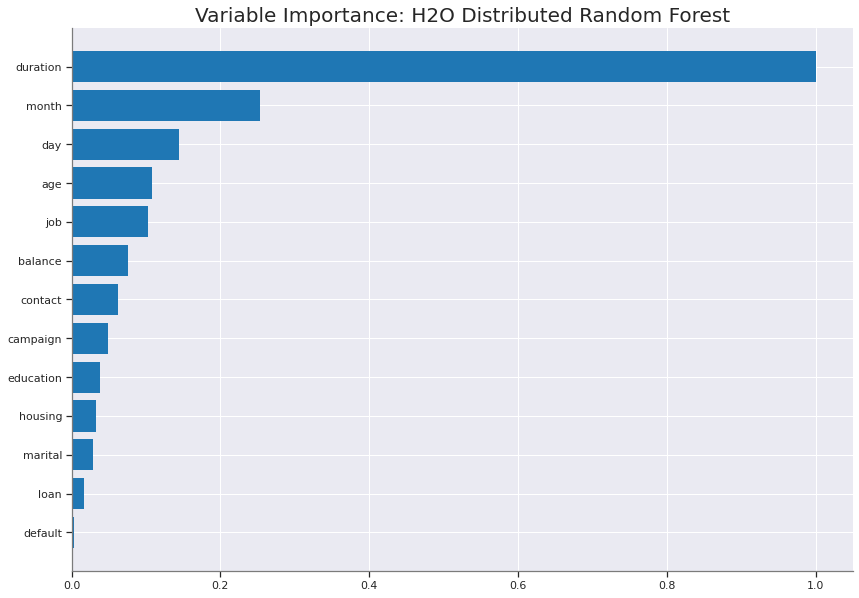

<Figure size 432x288 with 0 Axes>

In [ ]:
#look at important variable
base_model.varimp_plot(num_of_features=20)

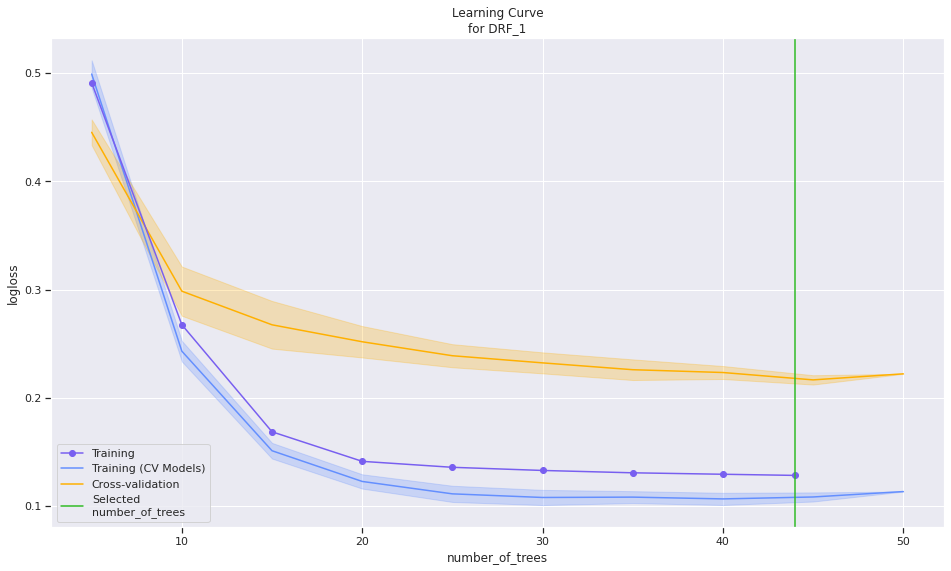

In [ ]:
learning_curve_plot = base_model.learning_curve_plot()

## Base Learner Model Explainability

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20220601_134615


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.03998322874862849: 


,,no,yes,Error,Rate
0,no,8517.0,687.0,0.0746,(687.0/9204.0)
1,yes,152.0,584.0,0.2065,(152.0/736.0)
2,Total,8669.0,1271.0,0.0844,(839.0/9940.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

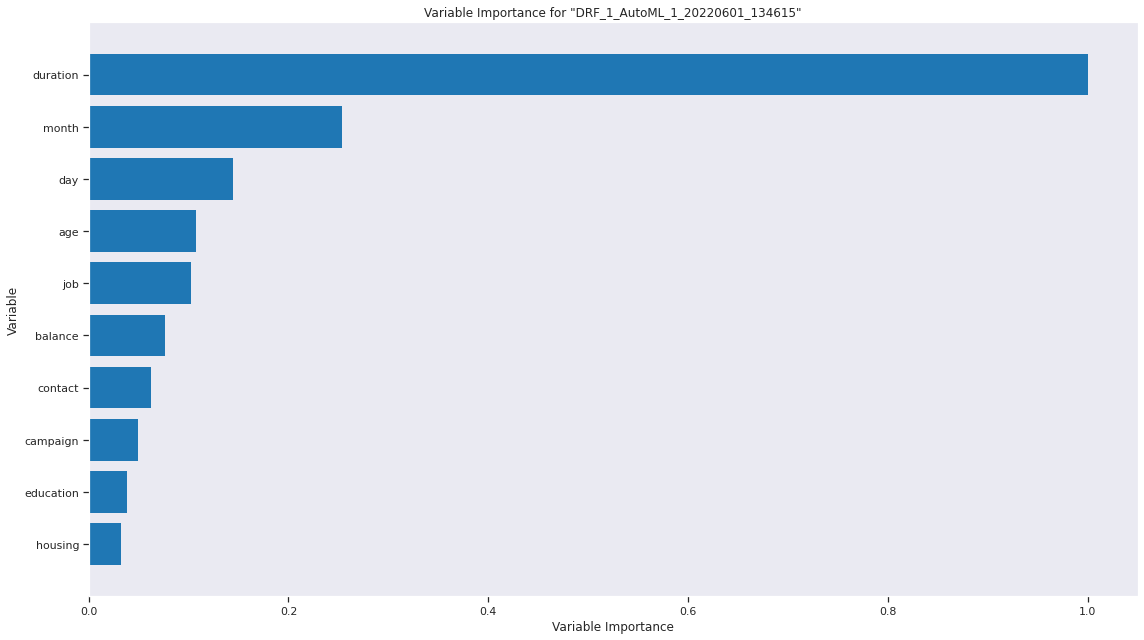

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

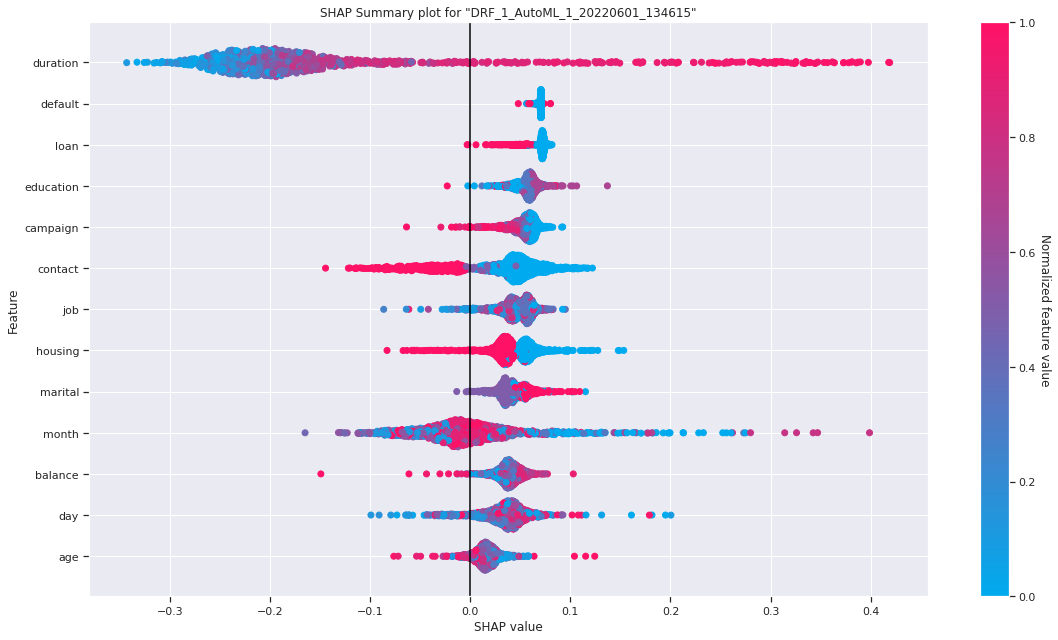

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

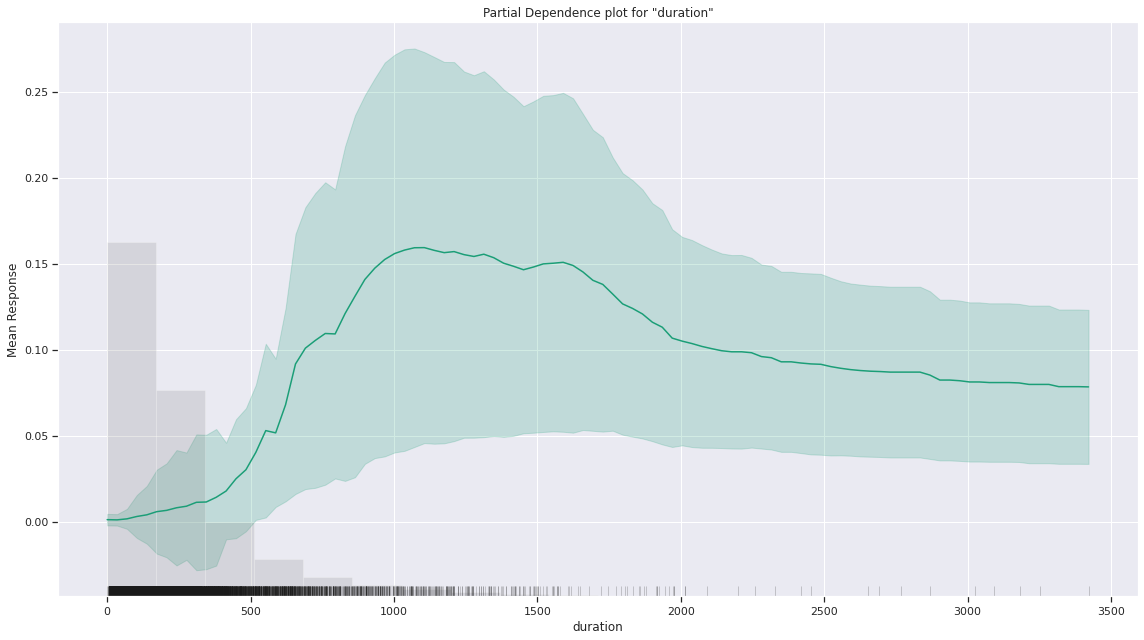

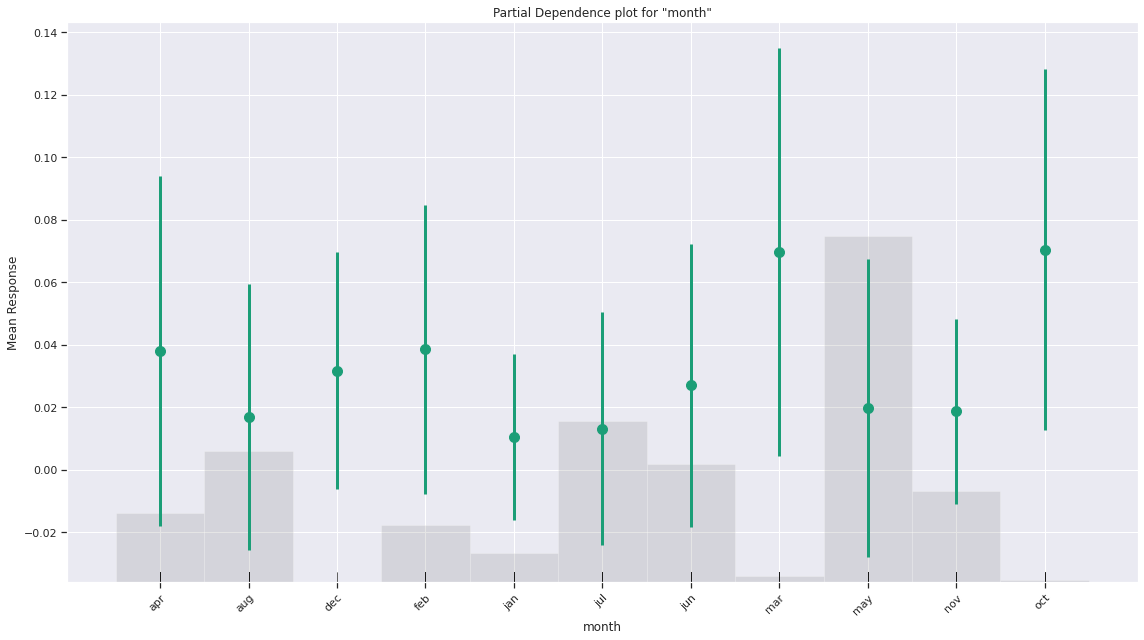

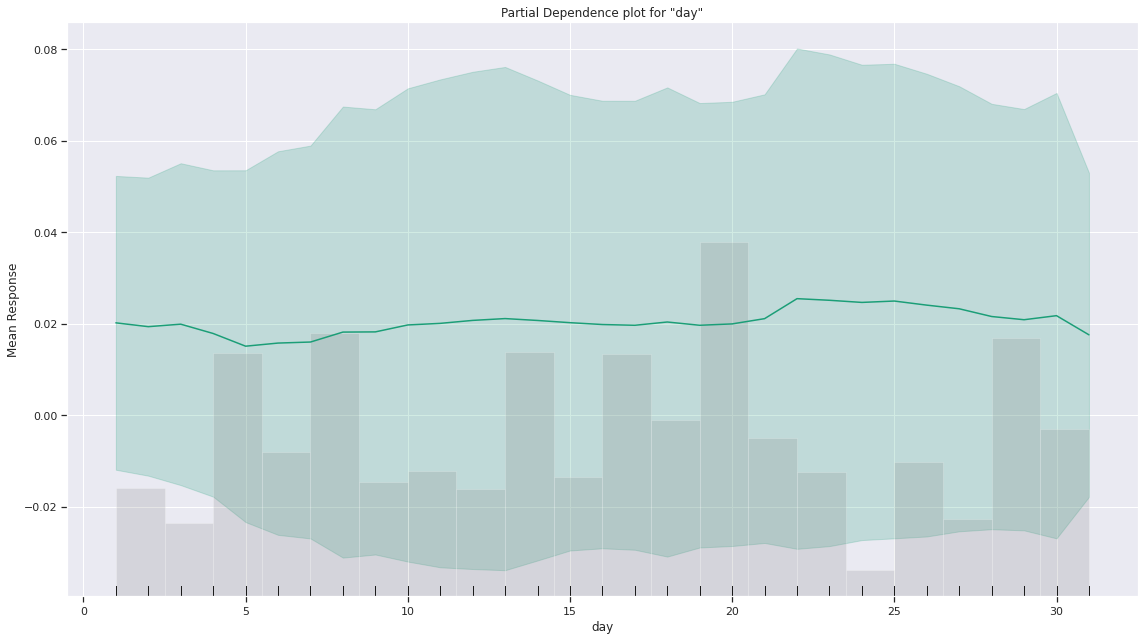

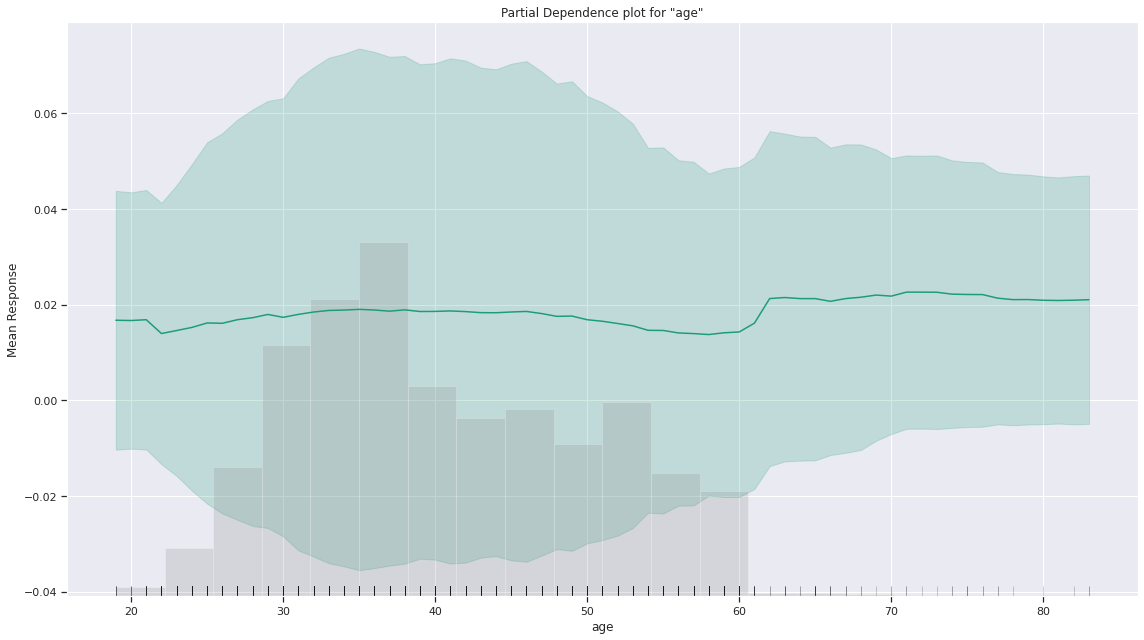

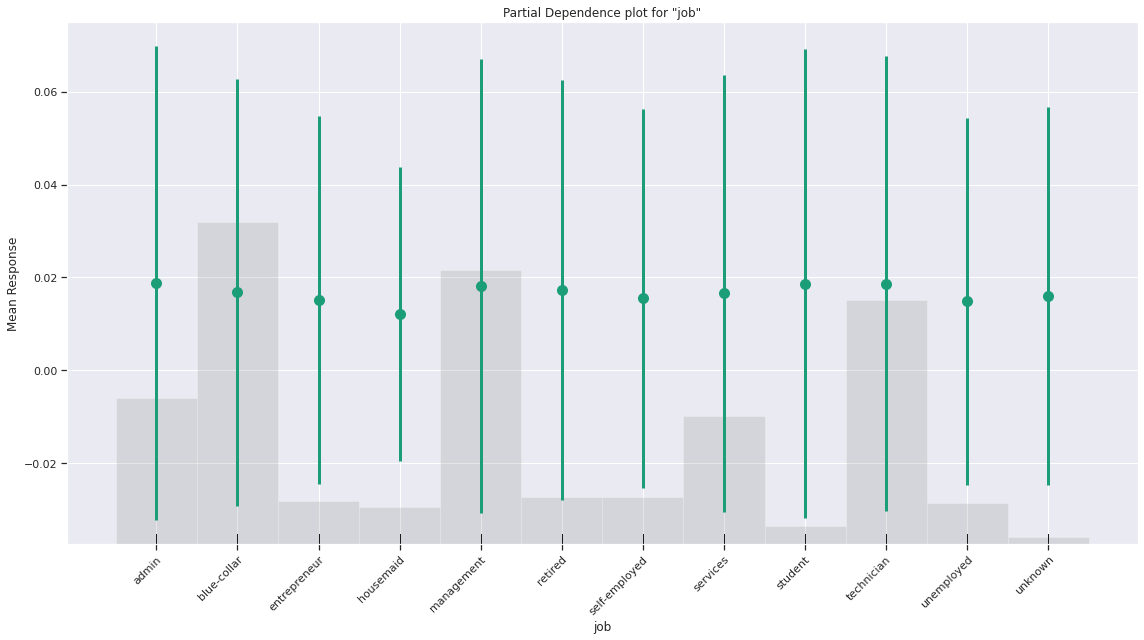

In [ ]:
#explain a model
base_exm = base_model.explain(test)

# Make Prediction

In [ ]:
#make prediction
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
#combine the prediction with the test dataset
df = test.cbind(preds)

#preview
df.head(10)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,predict,no,yes
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,no,0.99973,0.000270326
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no,no,0.999868,0.000131789
41,admin,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,no,no,0.996506,0.00349384
29,admin,single,secondary,no,390,yes,no,unknown,5,may,137,1,no,no,0.999164,0.000835946
53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,no,no,0.934872,0.0651279
45,admin,single,unknown,no,13,yes,no,unknown,5,may,98,1,no,no,0.999873,0.00012696
36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,no,no,0.99886,0.00114022
57,technician,married,secondary,no,839,no,yes,unknown,5,may,225,1,no,no,0.998784,0.00121562
37,admin,single,secondary,no,0,yes,no,unknown,5,may,137,1,no,no,0.999713,0.000286973
50,management,married,secondary,no,49,yes,no,unknown,5,may,180,2,no,no,0.999845,0.000155414


In [ ]:
df = h2o.as_list(df)

preds = df[['y', 'predict']].head(20)
preds

,y,predict
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
5,no,no
6,no,no
7,no,no
8,no,no
9,no,no


In [ ]:
df.to_csv('df.csv')

In [ ]:
preds.to_csv('preds.csv')